#**Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#**Dataset**

In [2]:
df_train = pd.read_csv("Dataset/Titanic_train.csv", encoding="ISO-8859-1")
df_test = pd.read_csv("Dataset/Titanic_test.csv", encoding="ISO-8859-1")


In [3]:
df_train.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Target: Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1


In [4]:
df_train['Target: Survived'].value_counts()

0    394
1    256
Name: Target: Survived, dtype: int64

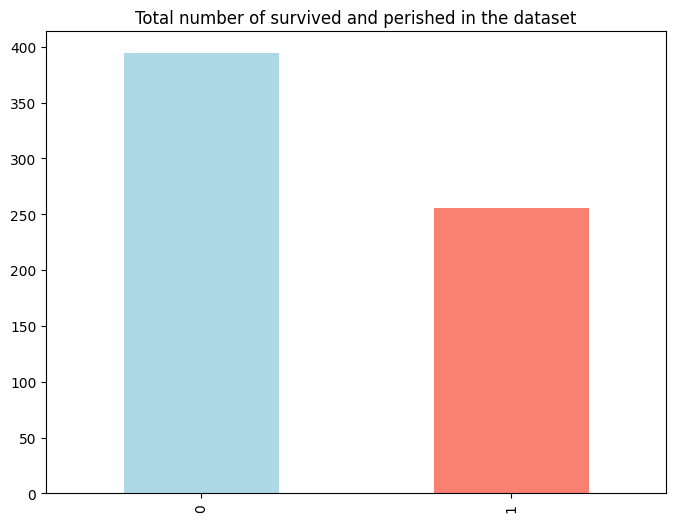

In [5]:
plt.figure(figsize=(8,6))

df_train['Target: Survived'].value_counts().plot.bar(color = ["lightblue","salmon"])
plt.title('Total number of survived and perished in the dataset')
plt.show()

#**Preprocessing**

In [6]:
#Filling empty Age data points with the average age to dampen their effect.
average_age = df_train['Age'].mean()

df_train.loc[df_train['Age'].isnull(),'Age'] = average_age
df_train.head(10)

average_age = df_test['Age'].mean()

df_test.loc[df_test['Age'].isnull(),'Age'] = average_age
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Target: Survived
0,1,3,"Mitkoff, Mr. Mito",male,29.2471,0,0,349221,7.8958,S,0
1,2,2,"Doling, Miss. Elsie",female,18.0000,0,1,231919,23.0000,S,1
2,3,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0000,0,0,8475,8.4333,S,0
3,4,3,"O'Leary, Miss. Hanora ""Norah""",female,29.2471,0,0,330919,7.8292,Q,1
4,5,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0000,0,0,365226,6.7500,Q,0
5,6,2,"Hickman, Mr. Leonard Mark",male,24.0000,2,0,S.O.C. 14879,73.5000,S,0
6,7,3,"Radeff, Mr. Alexander",male,29.2471,0,0,349223,7.8958,S,0
7,8,3,"Bourke, Mrs. John (Catherine)",female,32.0000,1,1,364849,15.5000,Q,0
8,9,2,"Eitemiller, Mr. George Floyd",male,23.0000,0,0,29751,13.0000,S,0
9,10,1,"Newell, Mr. Arthur Webster",male,58.0000,0,2,35273,113.2750,C,0


In [7]:
#Shuffle dataset
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train.head(10)

df_test = df_test.sample(frac=1).reset_index(drop=True)
df_test.head(10)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Target: Survived
0,213,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0000,0,0,17466,25.9292,S,1
1,222,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0000,1,1,11751,52.5542,S,1
2,171,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0000,1,1,12749,93.5000,S,1
3,56,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0000,0,0,250655,26.0000,S,0
4,183,3,"Saad, Mr. Amin",male,29.2471,0,0,2671,7.2292,C,0
5,18,3,"Rommetvedt, Mr. Knud Paust",male,29.2471,0,0,312993,7.7750,S,0
6,235,3,"Sutehall, Mr. Henry Jr",male,25.0000,0,0,SOTON/OQ 392076,7.0500,S,0
7,13,1,"Colley, Mr. Edward Pomeroy",male,47.0000,0,0,5727,25.5875,S,0
8,107,3,"Carlsson, Mr. August Sigfrid",male,28.0000,0,0,350042,7.7958,S,0
9,204,1,"Lines, Miss. Mary Conover",female,16.0000,0,1,PC 17592,39.4000,S,1


In [8]:
# Dropping columns deemed to be irrelevant
df_train = df_train.drop(columns=['PassengerId','Name', 'Ticket', 'Fare', 'Embarked'])

df_test = df_test.drop(columns=['PassengerId','Name', 'Ticket', 'Fare', 'Embarked'])


df_train.head(10)

,Pclass,Sex,Age,SibSp,Parch,Target: Survived
0,3,male,35.0,0,0,0
1,1,female,49.0,1,0,1
2,3,male,49.0,0,0,0
3,1,female,63.0,1,0,1
4,3,male,42.0,0,1,0
5,2,male,28.0,0,0,0
6,2,female,24.0,1,2,1
7,3,male,23.0,0,0,0
8,2,male,29.0,0,0,0
9,1,male,50.0,1,0,0


In [9]:
#One hot encoding
df_train['Sex']=df_train['Sex'].apply(lambda x: 1 if x=='male' else 0)
df_test['Sex']=df_test['Sex'].apply(lambda x: 1 if x=='male' else 0)

df_train.head(10)

,Pclass,Sex,Age,SibSp,Parch,Target: Survived
0,3,1,35.0,0,0,0
1,1,0,49.0,1,0,1
2,3,1,49.0,0,0,0
3,1,0,63.0,1,0,1
4,3,1,42.0,0,1,0
5,2,1,28.0,0,0,0
6,2,0,24.0,1,2,1
7,3,1,23.0,0,0,0
8,2,1,29.0,0,0,0
9,1,1,50.0,1,0,0


#**Train**

In [10]:
#Splitting the data
X_train= df_train.drop(columns=['Target: Survived'])

y_train= df_train['Target: Survived']

X_test= df_test.drop(columns=['Target: Survived'])
y_test= df_test['Target: Survived']

#**Tuning**

In [11]:
# This block will take a while to run as it is fitting 400 times.
tuned_parameters = {
    'kernel': ['rbf'],
    'gamma': [1,0.1,0.01,0.001],
    'C':[0.1,1,10,100,1000]
    }
svm_grid = GridSearchCV(SVC(),tuned_parameters,refit=True,verbose=3)
svm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.592 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [12]:
print("Best parameters:", svm_grid.best_params_)
print("Accuracy:", svm_grid.score(X_test,y_test))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.8423236514522822


#**Training with tuned parameters**

In [13]:
best_kernel = svm_grid.best_params_['kernel']
best_gamma = svm_grid.best_params_['gamma']
best_C = svm_grid.best_params_['C']
tuned_svm= SVC(kernel=best_kernel,C=best_C,gamma=best_gamma)

In [14]:
tuned_svm.fit(X_train,y_train)

SVC(C=100, gamma=0.01)

#**Final Test**

In [15]:
y_pred_SVM= tuned_svm.predict(X_test)
print(classification_report(y_test, list( map(lambda x: 1 if x>= 0.5 else 0 , y_pred_SVM))))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       155
           1       0.81      0.73      0.77        86

    accuracy                           0.84       241
   macro avg       0.83      0.82      0.82       241
weighted avg       0.84      0.84      0.84       241



#**Persistence**

In [16]:
#Save model to disk
filepath = './models/mainmodel.sav'
pickle.dump(tuned_svm, open(filepath, 'wb'))

In [46]:
#Load saved model from disk
loaded_model = pickle.load(open(filepath, 'rb'))
result = loaded_model.score(X_test, y_test)